In [1]:
%load_ext autoreload
%autoreload 2 

import numpy as np
%matplotlib inline


In [2]:
# from re1_utils.camera import get_rs_extrinsic_mat
# extrinsic_mat = get_rs_extrinsic_mat(type = 'cam2base')
# from re1_utils.camera import get_rs_intrinsic_mat
# intrinsic_mat = get_rs_intrinsic_mat()
# print(intrinsic_mat)
# inv_intrinsic_mat = np.linalg.inv(intrinsic_mat)
# print(inv_intrinsic_mat)
# from re1_utils.camera import get_rs_extrinsic_mat
# inv_extrinsic_mat = get_rs_extrinsic_mat(type = 'cam2base')
# print(inv_extrinsic_mat)


[[606.46295166   0.         323.97521973]
 [  0.         606.402771   234.81144714]
 [  0.           0.           1.        ]]
[[ 0.00164891  0.         -0.53420447]
 [ 0.          0.00164907 -0.38722027]
 [ 0.          0.          1.        ]]
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[[ 0.98966507 -0.06517314  0.12773222  0.01257551]
 [ 0.12879091  0.01229289 -0.99159558  0.02102222]
 [ 0.0630552   0.99779825  0.02055955  1.32158661]
 [ 0.          0.          0.          1.        ]]


In [38]:
from re1_utils.math_utils import get_rotation_mat
inv_intrinsic_mat = np.array(
[[ 0.00164891,  0.,         -0.53420447,],
 [ 0.        ,  0.00164907, -0.38722027,],
 [ 0.        ,  0.,          1.,        ]]
)
height = 1.28575359
head_pan = 0.10891263593988053
head_tilt = 0.027611654181941538
inv_extrinsic_mat = get_rotation_mat(x_angle=0, y_angle=-head_tilt, z_angle=-head_pan)
inv_extrinsic_mat = np.concatenate((inv_extrinsic_mat, np.array([0,0,height]).reshape(3,1)), axis=1)
inv_extrinsic_mat = np.concatenate((inv_extrinsic_mat, np.array([0,0,0,1]).reshape(1,4)), axis=0)
print(inv_extrinsic_mat)


[[ 0.99369596  0.10869744 -0.02744456  0.        ]
 [-0.10865601  0.99407488  0.00300093  0.        ]
 [ 0.02760815  0.          0.99961882  1.28575359]
 [ 0.          0.          0.          1.        ]]


In [39]:
from POI.object_of_interest import OOI
pred =np.array(
[[         70,         479,         116,         628,     0.89845,          39],
 [        199,         492,         249,         633,     0.87461,          39],
 [        218,         256,         258,         367,     0.34034,          39]]
)
depths = [1.2018723487854004, 1.1422603130340576, 1.3461313247680664]
all_objects = []
for i in range(pred.shape[0]):
    coord = pred[i, :]
    obj = OOI(
        img_coord = np.array([(coord[2]+coord[0])/2,(coord[3]+coord[1])/2]), 
        depth = depths[i],
        obj_class = int(coord[-1]),
        obj_atributes = 'None', 
        bbox = ((coord[0],coord[1]),(coord[2],coord[3])),
        conf_score = coord[4],
        eid = i
    )
    all_objects.append(obj)

In [40]:
landmarks = {'locations': {}, 'objects': {}}
for i, object in enumerate(all_objects):
    landmarks['objects'][i] = object
    landmarks['objects'][i].set_cam_coord(inv_intrinsic_mat)
    landmarks['objects'][i].set_world_coord(inv_extrinsic_mat)

In [41]:
for i, object in enumerate(all_objects):
    print(landmarks['objects'][i].obj_name, landmarks['objects'][i].img_coord[:-1])
    print(landmarks['objects'][i].temp_cam_coord)
    print(landmarks['objects'][i].cam_coord,landmarks['objects'][i].base_coord)
    

bottle [ 93.  553.5]
[-0.47062167 -0.28106597  1.20187235]
[ 1.20187235  0.28106597 -0.47062167] [1.23776286 0.14739766 0.84849278]
bottle [224.  562.5]
[-0.46423052 -0.02036489  1.14226031]
[ 1.14226031  0.02036489 -0.46423052] [ 1.15001367 -0.10526235  0.85323571]
bottle [238.  311.5]
[0.01004546 0.00707848 1.34613132]
[ 1.34613132 -0.00707848  0.01004546] [ 1.33660015 -0.15327166  1.33295941]


In [63]:
from planning.path_planner import PathPlanner
path_planner = PathPlanner(landmark_dict=landmarks)

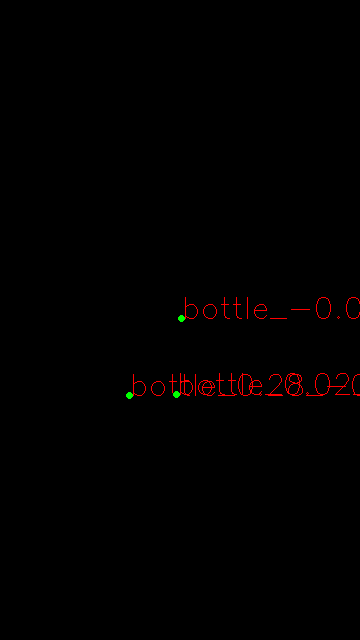

In [64]:
path_planner.viz_cam()


1.2377628573126351 0.14739766348257385 0.8484927787617751
(153, 368)
1.1500136745788228 -0.1052623483310329 0.8532357134339545
(198, 366)
1.3366001532083955 -0.15327165688435032 1.3329594086457384
(207, 213)


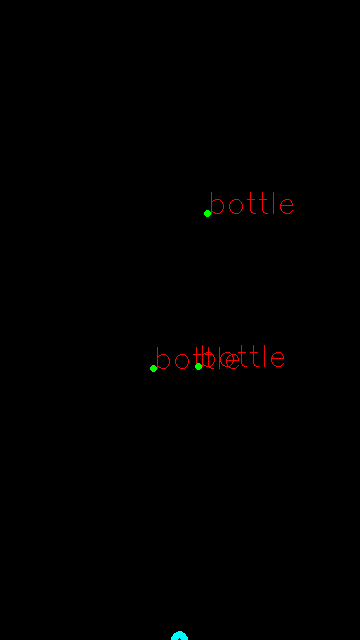

In [65]:
path_planner.viz_base(coord_type='yz')

1.2377628573126351 0.14739766348257385 0.8484927787617751
(153, 375)
1.1500136745788228 -0.1052623483310329 0.8532357134339545
(198, 394)
1.3366001532083955 -0.15327165688435032 1.3329594086457384
(207, 354)


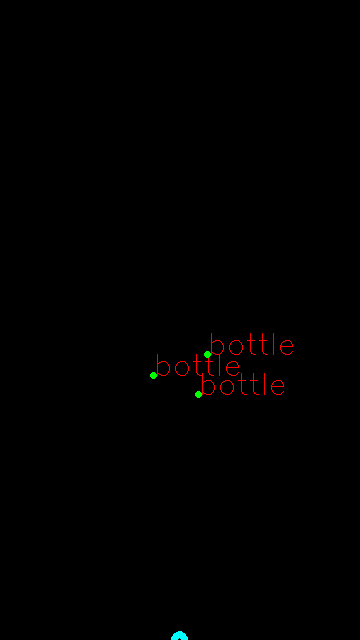

In [66]:
path_planner.viz_base(coord_type='xy')